<a href="https://colab.research.google.com/github/Ibrahim-Abido/MachineLearningColabProjects/blob/CIFAR/Assignment4_CIFAR_IbrahimGomaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("The CIFAR10 database has a training set of %d examples." % len(X_train))
print("The CIFAR10 database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
The CIFAR10 database has a training set of 50000 examples.
The CIFAR10 database has a test set of 10000 examples.


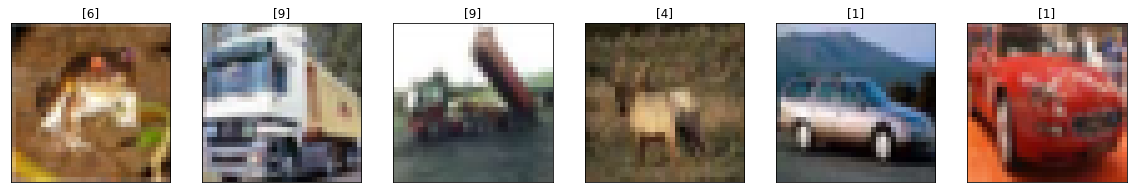

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))


In [ ]:
img=X_train[0]
img.shape

(32, 32, 3)

In [ ]:
max(y_train)

array([9], dtype=uint8)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from collections import Counter
counted = Counter(np.concatenate( y_train, axis=0 ))
counted

Counter({0: 5000,
         1: 5000,
         2: 5000,
         3: 5000,
         4: 5000,
         5: 5000,
         6: 5000,
         7: 5000,
         8: 5000,
         9: 5000})

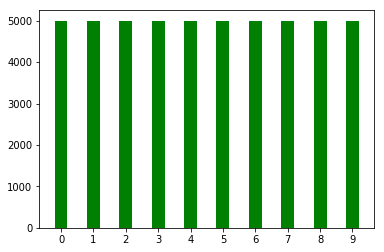

In [ ]:
plt.bar(counted.keys(), counted.values(), 0.4, color='g')
plt.xticks(np.arange(0, 10, 1)) 
plt.show()

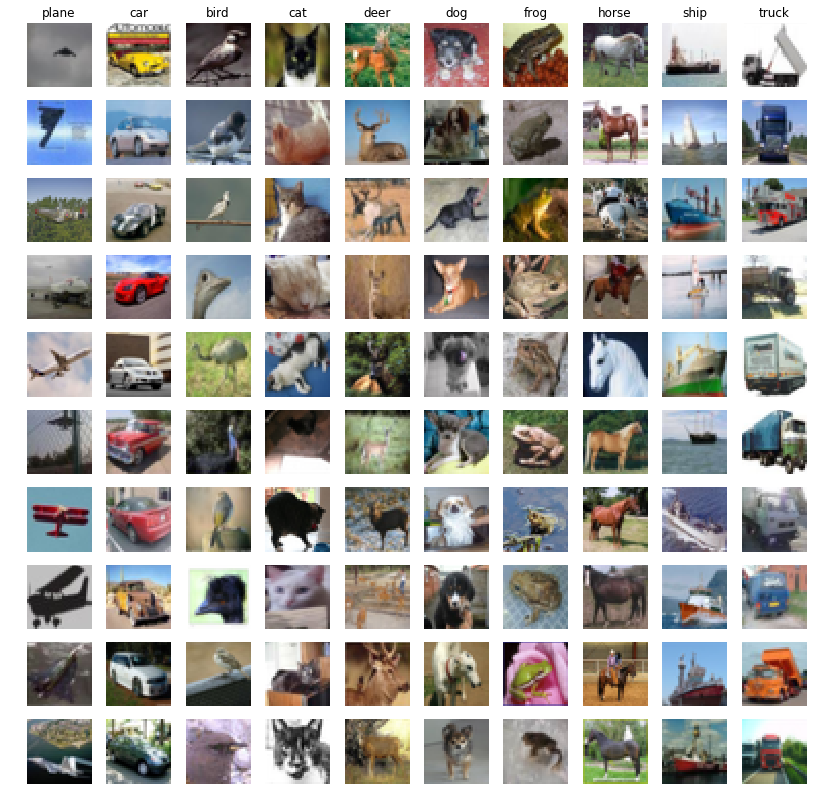

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 10
fig = plt.figure(figsize=(14,14))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
__________

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
X_train=X_train .reshape((50000, 32 , 32,3))
X_test=X_test .reshape((10000, 32 , 32,3))


In [ ]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
from keras.optimizers import RMSprop
opt=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
50000/50000 [==============================] - 89s 2ms/step - loss: 1.7821 - acc: 0.3551
Epoch 2/10
 8960/50000 [====>.........................] - ETA: 1:13 - loss: 1.4964 - acc: 0.4684

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

The accuracy has increased from 10% to 71%

##Now lets try another architecture

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))


model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=128)

In [ ]:
# evaluate test accuracy
score = model2.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

##Lets try a third architechture

In [ ]:
modell = models.Sequential()
modell.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modell.add(layers.MaxPooling2D((2, 2)))
modell.add(layers.Conv2D(256, (3, 3), activation='relu'))
modell.add(layers.MaxPooling2D((2, 2)))


modell.add(layers.Flatten())
modell.add(layers.Dense(256, activation='relu'))
modell.add(layers.Dense(128, activation='relu'))
modell.add(layers.Dense(10, activation='softmax'))
modell.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
__________

In [ ]:
modell.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
modell.fit(X_train, y_train, epochs=7, batch_size=128)

Epoch 1/7
50000/50000 [==============================] - 7s 146us/step - loss: 1.6691 - acc: 0.4064
Epoch 2/7
50000/50000 [==============================] - 7s 134us/step - loss: 1.1289 - acc: 0.6038
Epoch 3/7
50000/50000 [==============================] - 7s 133us/step - loss: 0.9148 - acc: 0.6825
Epoch 4/7
50000/50000 [==============================] - 7s 134us/step - loss: 0.7489 - acc: 0.7399
Epoch 5/7
50000/50000 [==============================] - 7s 134us/step - loss: 0.5992 - acc: 0.7921
Epoch 6/7
50000/50000 [==============================] - 7s 134us/step - loss: 0.4641 - acc: 0.8383
Epoch 7/7
50000/50000 [==============================] - 7s 134us/step - loss: 0.3507 - acc: 0.8782


In [ ]:
# evaluate test accuracy
score = modell.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 120us/step
Test accuracy: 71.4300%


This design has higher accuracy on training data but it seems to suffer from *overfitting*

##Lets try another model

In [ ]:
modeln = models.Sequential()
modeln.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modeln.add(layers.MaxPooling2D((2, 2)))
modeln.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modeln.add(layers.MaxPooling2D((2, 2)))

modeln.add(layers.Flatten())
modeln.add(layers.Dense(64, activation='relu'))
modeln.add(layers.Dense(10, activation='softmax'))
modeln.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                294976    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total para

In [ ]:
modeln.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
modeln.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
50000/50000 [==============================] - 4s 89us/step - loss: 1.6538 - acc: 0.4115
Epoch 2/5
50000/50000 [==============================] - 4s 76us/step - loss: 1.2231 - acc: 0.5719
Epoch 3/5
50000/50000 [==============================] - 4s 75us/step - loss: 1.0486 - acc: 0.6360
Epoch 4/5
50000/50000 [==============================] - 4s 78us/step - loss: 0.9350 - acc: 0.6754
Epoch 5/5
50000/50000 [==============================] - 4s 82us/step - loss: 0.8460 - acc: 0.7090


In [ ]:
modeln.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
50000/50000 [==============================] - 4s 78us/step - loss: 0.7659 - acc: 0.7338
Epoch 2/5
50000/50000 [==============================] - 4s 75us/step - loss: 0.6972 - acc: 0.7593
Epoch 3/5
50000/50000 [==============================] - 4s 75us/step - loss: 0.6314 - acc: 0.7835
Epoch 4/5
50000/50000 [==============================] - 4s 75us/step - loss: 0.5712 - acc: 0.8016
Epoch 5/5
50000/50000 [==============================] - 4s 76us/step - loss: 0.5144 - acc: 0.8222


In [ ]:
# evaluate test accuracy
score = modell.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 103us/step
Test accuracy: 71.4300%


##Implementing cross validation

In [ ]:

from sklearn.model_selection import train_test_split
from keras.datasets import cifar10

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

40000 train samples
10000 test samples
10000 validation samples


In [ ]:
X_train.shape

(40000, 32, 32, 3)

In [ ]:
X_valid.shape

(10000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(40000, 1)

In [ ]:
y_valid.shape

(10000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

In [ ]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

In [ ]:
X_train=X_train .reshape((40000, 32 , 32,3))
X_test=X_test .reshape((10000, 32 , 32,3))
X_valid=X_valid .reshape((10000, 32 , 32,3))

In [ ]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_valid = np_utils.to_categorical(y_valid, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [2]
 [5]
 [6]
 [3]
 [3]
 [8]
 [3]
 [3]
 [0]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#Defining a model with maxpool and without drobout

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 16)        208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 64)          8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=20,
          validation_data=(X_valid, y_valid), 
          verbose=2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 1.5703 - acc: 0.4336 - val_loss: 1.3141 - val_acc: 0.5297
Epoch 2/20
 - 6s - loss: 1.2086 - acc: 0.5713 - val_loss: 1.1041 - val_acc: 0.6087
Epoch 3/20
 - 5s - loss: 1.0393 - acc: 0.6347 - val_loss: 0.9977 - val_acc: 0.6515
Epoch 4/20
 - 5s - loss: 0.9230 - acc: 0.6784 - val_loss: 0.9369 - val_acc: 0.6799
Epoch 5/20
 - 5s - loss: 0.8273 - acc: 0.7118 - val_loss: 0.9590 - val_acc: 0.6698
Epoch 6/20
 - 5s - loss: 0.7552 - acc: 0.7396 - val_loss: 0.9013 - val_acc: 0.6948
Epoch 7/20
 - 5s - loss: 0.6909 - acc: 0.7628 - val_loss: 0.9096 - val_acc: 0.6990
Epoch 8/20
 - 5s - loss: 0.6347 - acc: 0.7836 - val_loss: 0.8929 - val_acc: 0.7071
Epoch 9/20
 - 5s - loss: 0.5886 - acc: 0.7973 - val_loss: 0.8787 - val_acc: 0.7170
Epoch 10/20
 - 5s - loss: 0.5535 - acc: 0.8094 - val_loss: 0.9731 - val_acc: 0.7106
Epoch 11/20
 - 5s - loss: 0.5176 - acc: 0.8243 - val_loss: 0.9454 - val_acc: 0.7148
Epoch 12/20
 - 5s - loss: 0.4823 - 

In [ ]:
# evaluate test accuracy
score = model.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 68us/step
Test accuracy: 70.4700%


#Now, I will add dropout and regularization to the architecture and use the transfere learning technique to select the model with best validation accuracy.

In [ ]:
from keras.regularizers import l2

modelTL = models.Sequential()
modelTL.add(layers.Conv2D(16, (2, 2), activation='relu',padding='same', input_shape=(32, 32, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelTL.add(layers.MaxPooling2D((2, 2)))
modelTL.add(layers.Conv2D(32, (2, 2), activation='relu',padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelTL.add(layers.MaxPooling2D((2, 2)))
modelTL.add(layers.Conv2D(64, (2, 2), activation='relu',padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelTL.add(layers.MaxPooling2D((2, 2)))
modelTL.add(layers.Dropout(0.3))
modelTL.add(layers.Flatten())
modelTL.add(layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelTL.add(layers.Dropout(0.4))
modelTL.add(layers.Dense(10, activation='softmax',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

modelTL.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
___________________________

In [ ]:
modelTL.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   


In [ ]:

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = modelTL.fit(X_train, y_train, batch_size=128, epochs=50,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 7s - loss: 2.5257 - acc: 0.2258 - val_loss: 2.1899 - val_acc: 0.2704

Epoch 00001: val_loss improved from inf to 2.18994, saving model to model.weights.best.hdf5
Epoch 2/50
 - 2s - loss: 2.2009 - acc: 0.2656 - val_loss: 2.1424 - val_acc: 0.2988

Epoch 00002: val_loss improved from 2.18994 to 2.14244, saving model to model.weights.best.hdf5
Epoch 3/50
 - 2s - loss: 2.1696 - acc: 0.2751 - val_loss: 2.1361 - val_acc: 0.2856

Epoch 00003: val_loss improved from 2.14244 to 2.13609, saving model to model.weights.best.hdf5
Epoch 4/50
 - 2s - loss: 2.1548 - acc: 0.2774 - val_loss: 2.1581 - val_acc: 0.2721

Epoch 00004: val_loss did not improve from 2.13609
Epoch 5/50
 - 2s - loss: 2.1448 - acc: 0.2837 - val_loss: 2.1258 - val_acc: 0.2938

Epoch 00005: val_loss improved from 2.13609 to 2.12585, saving model to model.weights.best.hdf5
Epoch 6/50
 - 2s - loss: 2.1362 - acc: 0.2918 - val

In [ ]:
# load the weights that yielded the best validation accuracy
modelTL.load_weights('model.weights.best.hdf5')

In [ ]:
# evaluate test accuracy
score = modelTL.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 82us/step
Test accuracy: 43.0500%


## We noticed that the accuracy on test set has decreased when we used regularization with each layer in the model. This means that the model seems to suffer from underfitting. May be the model is not powerful enough, is over-regularized, or has not been trained long enough.

#Lets try another model

In [ ]:

modelL2 = models.Sequential()
modelL2.add(layers.Conv2D(16, (2, 2), activation='relu',padding='same', input_shape=(32, 32, 3)))
modelL2.add(layers.MaxPooling2D((2, 2)))
modelL2.add(layers.Conv2D(32, (2, 2), activation='relu',padding='same'))
modelL2.add(layers.MaxPooling2D((2, 2)))
modelL2.add(layers.Conv2D(64, (2, 2), activation='relu',padding='same'))
modelL2.add(layers.MaxPooling2D((2, 2)))
modelL2.add(layers.Dropout(0.3))
modelL2.add(layers.Flatten())
modelL2.add(layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelL2.add(layers.Dropout(0.4))
modelL2.add(layers.Dense(10, activation='softmax',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

modelL2.summary()

NameError: ignored

In [ ]:
modelL2.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = modelL2.fit(X_train, y_train, batch_size=128, epochs=50,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

NameError: ignored

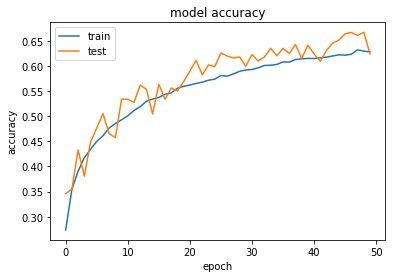

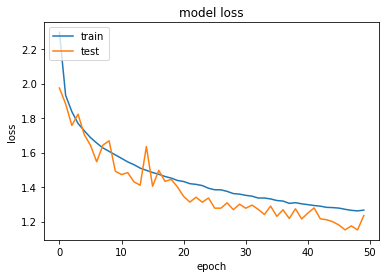

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# load the weights that yielded the best validation accuracy
modelL2.load_weights('model.weights.best.hdf5')

In [ ]:
# evaluate test accuracy
score = modelL2.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 120us/step
Test accuracy: 67.0300%


#In the next sections I will use transfere learning concept to use a pretrained network "VGG16"

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))

num_classes = 10

x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

head_model = Model(input = base_model.input, output = predictions)

head_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

head_model.summary()


58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app


In [ ]:

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = head_model.fit(X_train, y_train, batch_size=128, epochs=30,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 28s 699us/step - loss: 1.9943 - acc: 0.1954 - val_loss: 2.7113 - val_acc: 0.1913

Epoch 00001: val_loss improved from inf to 2.71134, saving model to model.weights.best.hdf5
Epoch 2/30
40000/40000 [==============================] - 21s 531us/step - loss: 1.7057 - acc: 0.2811 - val_loss: 3.6809 - val_acc: 0.2606

Epoch 00002: val_loss did not improve from 2.71134
Epoch 3/30
40000/40000 [==============================] - 21s 530us/step - loss: 1.4819 - acc: 0.3905 - val_loss: 2.1764 - val_acc: 0.3291

Epoch 00003: val_loss improved from 2.71134 to 2.17644, saving model to model.weights.best.hdf5
Epoch 4/30
40000/40000 [==============================] - 22s 538us/step - loss: 1.3229 - acc: 0.4816 - val_loss: 4.7496 - val_acc: 0.3007

Epoch 00004: val_loss did not improve from 2.17644
Epoch 5/30
40000/40000 [==============================] - 22s 542us/step - loss: 1.2213 - acc: 0.537

In [ ]:
# load the weights that yielded the best validation accuracy
head_model.load_weights('model.weights.best.hdf5')

In [ ]:
# evaluate test accuracy
score = head_model.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 3s 315us/step
Test accuracy: 80.1700%


##We have got higher accuracy using transfere learning

#Now lets visualize some predictions

In [ ]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

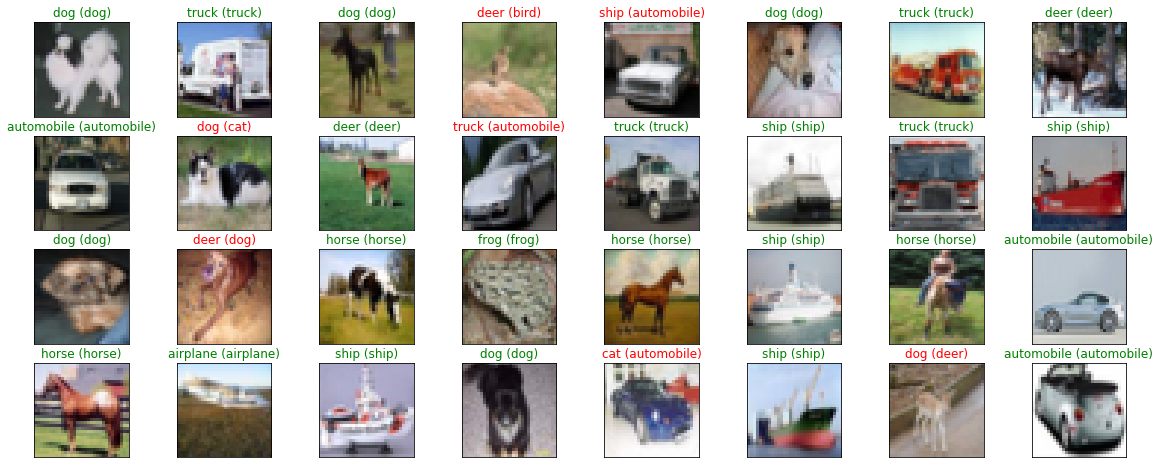

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

#Now lets use data augmentation to improve model performance

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( rotation_range=90,
                 width_shift_range=0.1, height_shift_range=0.1,
                 horizontal_flip=True)
datagen.fit(X_train)

In [ ]:
from keras import optimizers
#training
batch_size = 128
 
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

opt_rms = optimizers.rmsprop(lr=0.001,decay=1e-6)
head_model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
head_model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(X_test,y_test),callbacks=[checkpointer])


Epoch 1/125
312/312 [==============================] - 31s 100ms/step - loss: 1.4529 - acc: 0.5195 - val_loss: 1.2957 - val_acc: 0.6132

Epoch 00001: val_loss improved from inf to 1.29573, saving model to model.weights.best.hdf5
Epoch 2/125
312/312 [==============================] - 23s 74ms/step - loss: 1.2329 - acc: 0.5745 - val_loss: 1.0041 - val_acc: 0.6725

Epoch 00002: val_loss improved from 1.29573 to 1.00414, saving model to model.weights.best.hdf5
Epoch 3/125
312/312 [==============================] - 23s 74ms/step - loss: 1.1547 - acc: 0.6009 - val_loss: 1.2712 - val_acc: 0.6101

Epoch 00003: val_loss did not improve from 1.00414
Epoch 4/125
312/312 [==============================] - 25s 81ms/step - loss: 1.1047 - acc: 0.6196 - val_loss: 0.9363 - val_acc: 0.7002

Epoch 00004: val_loss improved from 1.00414 to 0.93633, saving model to model.weights.best.hdf5
Epoch 5/125
312/312 [==============================] - 24s 76ms/step - loss: 1.0671 - acc: 0.6342 - val_loss: 0.8325 - v

In [ ]:
# load the weights that yielded the best validation accuracy
head_model.load_weights('model.weights.best.hdf5')

In [ ]:
# evaluate test accuracy
score = head_model.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 3s 316us/step
Test accuracy: 83.6300%


#So now this model seems to generalize will and we have higher accuracy score. For further improvement we may need to add layers and increase the number of epochs.

#Lets try to get higher accuracy as much as we can

In [ ]:
#Here I get an architechture from the internet, edit on it and tried many iterations with different modififcations and finally mix these things with the techniques used above.

from keras import optimizers

from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
batch_size=128


weight_decay = 1e-4


modelLast = Sequential()
modelLast.add(Conv2D(32, (3,3), padding='same',  input_shape=X_train.shape[1:]))
modelLast.add(Activation('elu'))
modelLast.add(BatchNormalization())
modelLast.add(Conv2D(32, (3,3), padding='same'))
modelLast.add(Activation('elu'))
modelLast.add(BatchNormalization())
modelLast.add(MaxPooling2D(pool_size=(2,2)))
#modelLast.add(Dropout(0.2))

modelLast.add(Conv2D(64, (3,3), padding='same'))
modelLast.add(Activation('elu'))
modelLast.add(BatchNormalization())
modelLast.add(Conv2D(64, (3,3), padding='same'))
modelLast.add(Activation('elu'))
modelLast.add(BatchNormalization())
modelLast.add(MaxPooling2D(pool_size=(2,2)))
#modelLast.add(Dropout(0.3))

modelLast.add(Conv2D(128, (3,3), padding='same'))
modelLast.add(Activation('elu'))
modelLast.add(BatchNormalization())
modelLast.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
modelLast.add(Activation('elu'))
modelLast.add(BatchNormalization())
modelLast.add(MaxPooling2D(pool_size=(2,2)))
modelLast.add(Dropout(0.4))

modelLast.add(Flatten())
modelLast.add(Dense(num_classes, activation='softmax'))

modelLast.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [ ]:
#Now I will use data augmentation and checkpoint technique I have used before with the new model.

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)


# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)


opt_rms = optimizers.rmsprop(lr=0.001,decay=1e-6)
modelLast.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
hist=modelLast.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(X_test,y_test),callbacks=[checkpointer])


Instructions for updating:
Use tf.cast instead.
Epoch 1/125
312/312 [==============================] - 23s 75ms/step - loss: 2.0265 - acc: 0.3898 - val_loss: 1.9701 - val_acc: 0.4331

Epoch 00001: val_loss improved from inf to 1.97012, saving model to model.weights.best.hdf5
Epoch 2/125
312/312 [==============================] - 18s 58ms/step - loss: 1.3020 - acc: 0.5662 - val_loss: 1.3476 - val_acc: 0.6158

Epoch 00002: val_loss improved from 1.97012 to 1.34755, saving model to model.weights.best.hdf5
Epoch 3/125
312/312 [==============================] - 18s 58ms/step - loss: 1.0646 - acc: 0.6420 - val_loss: 1.1445 - val_acc: 0.6343

Epoch 00003: val_loss improved from 1.34755 to 1.14451, saving model to model.weights.best.hdf5
Epoch 4/125
312/312 [==============================] - 18s 57ms/step - loss: 0.9353 - acc: 0.6832 - val_loss: 0.8514 - val_acc: 0.7236

Epoch 00004: val_loss improved from 1.14451 to 0.85142, saving model to model.weights.best.hdf5
Epoch 5/125
312/312 [=======

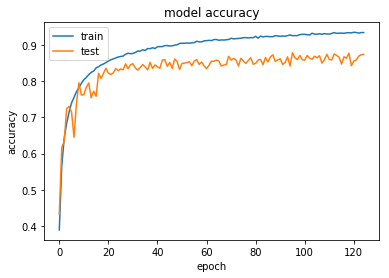

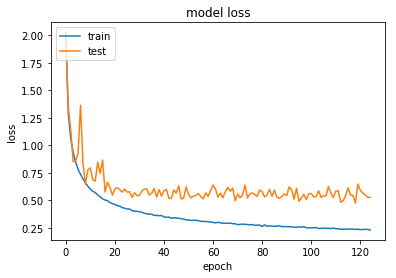

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# load the weights that yielded the best validation accuracy
modelLast.load_weights('model.weights.best.hdf5')

In [ ]:
# evaluate test accuracy
score = modelLast.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 106us/step
Test accuracy: 87.6700%


##Now we have a very good accuracy score for our model